In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
# Paths to datasets
path1 = r"C:\Users\inees\Downloads\Data.csv"
path2 = r"C:\Users\inees\Downloads\State_data.csv"
path3 = r"C:\Users\inees\Downloads\NCAP_Funding.csv"

# Spatial aggregation

## Q1

In [58]:
import pandas as pd

df = pd.read_csv(path1)

# Avg PM2.5 for each state
df_dropped = df.dropna(subset = ["PM2.5"]) # Drop rows w PM2.5 missing
avg_pm = df_dropped.groupby( by = "state")["PM2.5"].mean()

idxm = avg_pm.idxmax() # Get the state w highest avg
m = avg_pm.max() # Get the value of the hight avg PM2.5 Conc

print(f"{idxm} has the highest average PM2.5 concentration (of {m:.3f}) across all stations and across all years.")

Delhi has the highest average PM2.5 concentration (of 104.101) across all stations and across all years.


## Q2

In [57]:
import pandas as pd

df = pd.read_csv(path1)

# Get rows for year 2023
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d")
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Drop rows w PM2.5 missing
df_2023 = df_2023.dropna(subset = ["PM2.5"])

# hazardous PM2.5 levels
hazardous_data = df_2023[df_2023["PM2.5"] > 300]
hazardous_days_per_state = hazardous_data.groupby("state")["Timestamp"].count()

# Find the state with the highest number of hazardous days
most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(f"The state with the most days having hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")

The state with the most days having hazardous PM2.5 levels in 2023 is Delhi with 470 days.


## Q3

In [56]:
import pandas as pd

df = pd.read_csv(path1)

# Get rows for year 2023
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d") # Convert Timestamp col to datetime format
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Drop rows w PM2.5 missing
df_2023 = df_2023.dropna(subset = ["PM2.5"])

# Calc variation (std dev) of PM2.5 per state
var_per_state = df_2023.groupby("state")["PM2.5"].std()

# Find the state with the highest variability
most_var_state = var_per_state.idxmax()
highest_var = var_per_state.max()

print(f"The state with the highest variability in PM2.5 levels in 2023 is {most_var_state} with a standard deviation of {highest_var:.3f}.")

The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.797.


## Q4

In [55]:
import pandas as pd

df = pd.read_csv(path1)

# Get rows for year 2020-21
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d") # Convert Timestamp col to datetime format
df_covid = df[(df["Timestamp"].dt.year >= 2020) & (df["Timestamp"].dt.year <= 2021)]

# Avg PM2.5 for each state
df_dropped = df_covid.dropna(subset = ["PM2.5"]) # Drop rows w PM2.5 missing
avg_pm = df_dropped.groupby( by = "state")["PM2.5"].mean()

idxm = avg_pm.idxmin() # Get the state w min avg
m = avg_pm.min() # Get the value of the min avg PM2.5 Conc

print(f"{idxm} has the lowest average PM2.5 concentration (of {m:.3f}) across all stations and across years 2020-2021.")

Mizoram has the lowest average PM2.5 concentration (of 14.323) across all stations and across years 2020-2021.


# Temporal Aggregation

## Q1

In [54]:
import pandas as pd

df = pd.read_csv(path1)

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = "%Y-%m-%d") # Convert Timestamp to datetime format

# Get data for Aug 2020
df_aug_2020 = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]
df_aug_2020 = df_aug_2020.dropna(subset  =["PM2.5"]) # Drop rows w PM2.5 missing

# Find max of pm2.5
idxm = df_aug_2020["PM2.5"].idxmax()
max_station, max_state, max_pm = df.loc[idxm, ["station", "state", "PM2.5"]]

print(f"{max_station} in the state of {max_state} recorded the highest PM2.5 value (of {max_pm}) in August 2020.")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in the state of Karnataka recorded the highest PM2.5 value (of 805.51) in August 2020.


## Q2

In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv(path1)

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = "%Y-%m-%d") # Convert Timestamp to datetime format

# Get rows for year 2018
df_2018 = df[df["Timestamp"].dt.year == 2018]

# Mask for the given stations
df_stations = df_2018[df_2018["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

df_stations = df_stations.dropna(subset = ["PM2.5"]) # Drop rows w PM2.5 missing

# Define seasons
get_season = [
    (df_stations["Timestamp"].dt.month.isin([12, 1, 2])),  # winter
    (df_stations["Timestamp"].dt.month.isin([3, 4, 5])),   # Summer
    (df_stations["Timestamp"].dt.month.isin([6, 7, 8, 9]))  # monsoon
]

# Corresponding seasons for each condition
seasons = ["Winter", "Summer", "Monsoon"]

# Assign a season to each row in df_stations w np.select()
df_stations["Season"] = np.select(get_season, seasons, default="Other")

# Calculate average PM2.5 for each season
avg_pm25_per_season = df_stations.groupby("Season")["PM2.5"].mean()

# Get season w the highest pollution
most_polluted_season = avg_pm25_per_season.idxmax()
highest_avg_pm25 = avg_pm25_per_season.max()

print(f"The average PM2.5 concentration for each season for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is:\n{avg_pm25_per_season}")
print(f"\nThe most polluted season in 2018 was {most_polluted_season} with an average PM2.5 concentration of {highest_avg_pm25:.3f}")

The average PM2.5 concentration for each season for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is:
Season
Monsoon    34.425196
Other      56.825144
Winter     67.492344
Name: PM2.5, dtype: float64

The most polluted season in 2018 was Winter with an average PM2.5 concentration of 67.492


## Q3

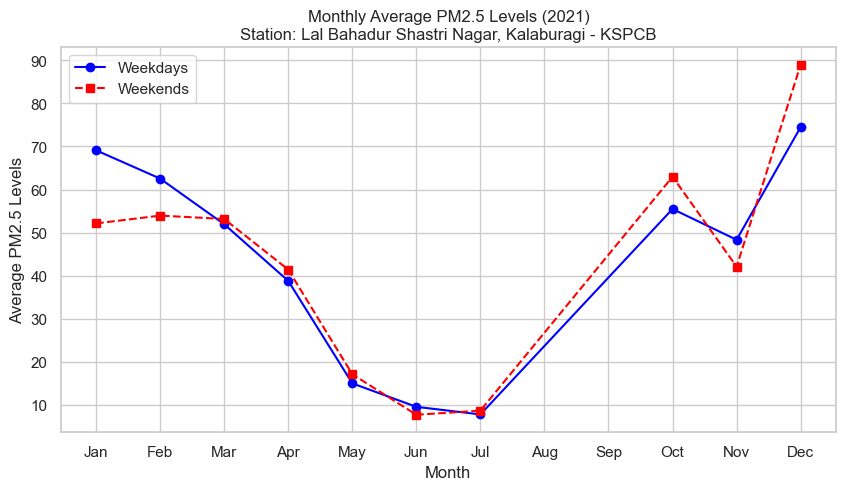

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path1)

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = "%Y-%m-%d") # Convert Timestamp to datetime format

# Get rows for year 2021, given station, make a new col for days
df_2021 = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
df_2021 = df_2021.dropna(subset = ["PM2.5"]) # Drop rows w PM2.5 missing

# Get month and day of the week
df_2021["Month"] = df_2021["Timestamp"].dt.month
df_2021["Day_of_week"] = df_2021["Timestamp"].dt.dayofweek  # Monday = 0, Sunday = 6

conditions = [df_2021["Day_of_week"] < 5, df_2021["Day_of_week"] >= 5]
choices = ["Weekday", "Weekend"]

# Assign weekday or weekend
df_2021["Type"] = np.select(conditions, choices, default = "Weekday")

# Group by month and type, then calc the avg PM2.5
monthly_avg_pm25 = df_2021.groupby(["Month", "Type"])["PM2.5"].mean().unstack() # turn multi indexed series to dataframe, for easy plotting

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekday"], marker="o", linestyle="-", label="Weekdays", color="blue")
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekend"], marker="s", linestyle="--", label="Weekends", color="red")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (2021)\nStation: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()

plt.show()

# Spatio-temporal aggregation 

## Q1

In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv(path1)

# Get rows for year 2022
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d") # Convert Timestamp col to datetime format

# Get data for 2022
df_2022 = df[df["Timestamp"].dt.year == 2022].copy()

# Get month and seasons
df_2022["Month"] = df_2022["Timestamp"].dt.month

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

df_summer = df_2022[df_2022['Month'].isin(summer_months)]
df_monsoon = df_2022[df_2022['Month'].isin(monsoon_months)]

# Calculate the avg PM2.5 levels for summer, monsoon
summer_avg = df_summer.groupby('state')['PM2.5'].mean()
monsoon_avg = df_monsoon.groupby('state')['PM2.5'].mean()

# Calculate the percentage change of pm2.5 levels of monsoon wrt summer for each state
percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
print(f"Percentage Change from Summer to Monsoon: \n{percentage_change}")

# state with the highest percentage change
max_change_state = percentage_change.abs().idxmax()
max_change_value = percentage_change.abs().max()

print(f"\nState with the highest PM2.5 change: {max_change_state} with a percentage decrease of{max_change_value: .3f}% in the monsoon, from the summer.")


Percentage Change from Summer to Monsoon: 
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -

## Q2

<Figure size 1000x600 with 0 Axes>

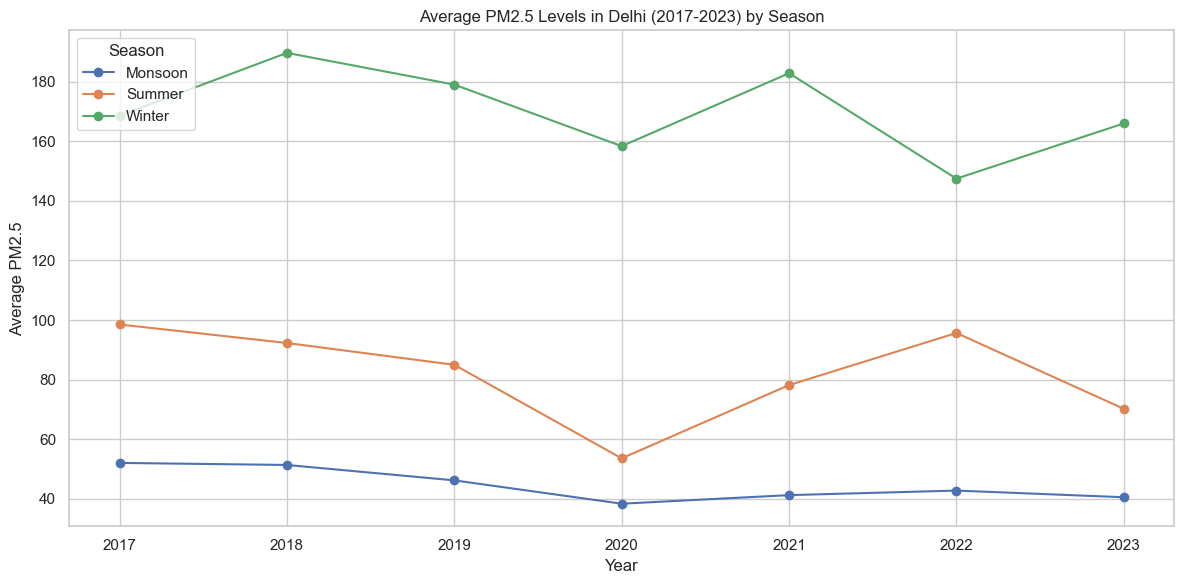

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path1)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

# Get Delhi data
df_delhi = df[df['city'] == 'Delhi'].copy()

# Get year and month
df_delhi['Year'] = pd.to_datetime(df_delhi['Timestamp'], format='%Y-%m-%d').dt.year
df_delhi['Month'] = pd.to_datetime(df_delhi['Timestamp'], format='%Y-%m-%d').dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Other'

df_delhi['Season'] = df_delhi['Month'].apply(get_season)

# Filter data for the years 2017 to 2023, summer winter monsoon seasons
df_delhi = df_delhi[(df_delhi['Year'] >= 2017) & 
            (df_delhi['Year'] <= 2023) & 
            (df_delhi['Season'].isin(['Winter', 'Summer', 'Monsoon']))]

# Calculate the avg PM2.5 levels for each season from 2017 - 2023
seasonal_avg_pm25 = df_delhi.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))
seasonal_avg_pm25.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Average PM2.5 Levels in Delhi (2017-2023) by Season")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.legend(title="Season", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

According to articles by __[ScienceDriect](https://www.sciencedirect.com/science/article/pii/S0169809520312631)__ and __[AQI.in](https://www.aqi.in/blog/en-in/temperature-inversion-and-air-pollution/)__ winter could be more polluted than other seasons due to atmosperic inversions where cold air in the lower atmosphere traps pollutants like PM2.5 near the Earth's surface, preventing them from escaping into the upper layers. Low wind speeds and fog also prevent their dispersion, leading to higher concentrations in the air.

An article by __[AQI.in](https://www.aqi.in/blog/us/effect-of-rain-on-air-pollution/)__ shows that monsoons might be less polluted as rain helps reduce air pollution through a process called wet deposition, where atmospheric pollutants like particulate matter and pollen are captured by raindrops and carried down to the ground, removing harmful particles from the air. Rain also increases humidity, which can further help in settling airborne pollutants. use this to explain the graph

## Q3

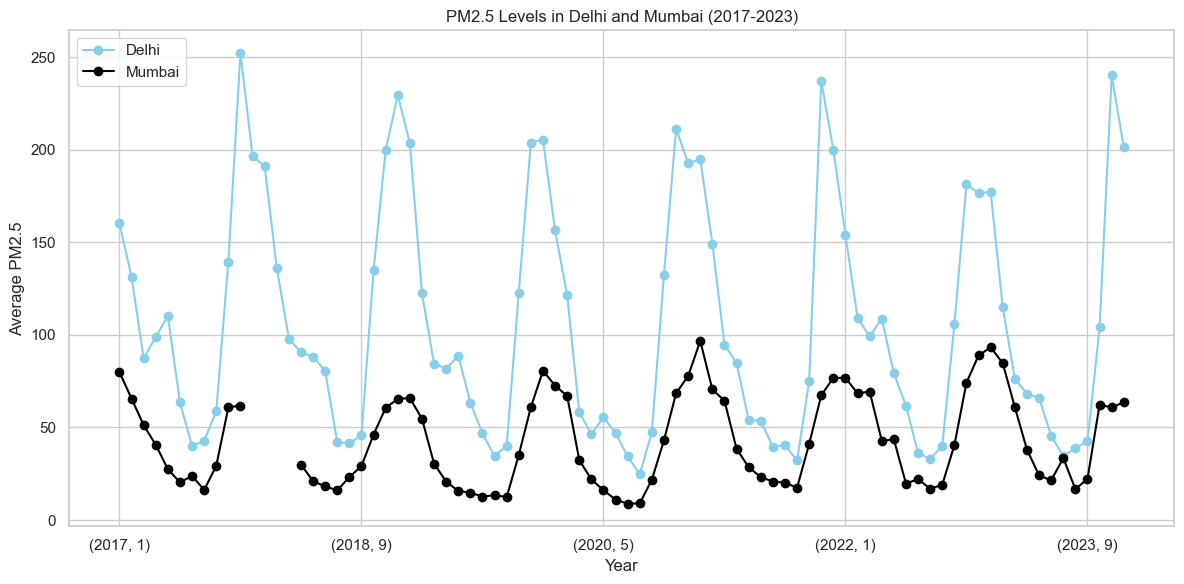

Delhi Fluctuation (Standard Deviation): 62.975
Mumbai Fluctuation (Standard Deviation): 24.526
Delhi had more fluctuations in PM2.5 levels.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path1)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

# Get data for Delhi and Mumbai
df_delhi_mumbai = df[df['city'].isin(['Delhi', 'Mumbai'])].copy()

# Get year and month from the Timestamp
df_delhi_mumbai['Year'] = df_delhi_mumbai['Timestamp'].dt.year
df_delhi_mumbai['Month'] = df_delhi_mumbai['Timestamp'].dt.month

# Get data for years between 2017 and 2023
df_delhi_mumbai = df_delhi_mumbai[(df_delhi_mumbai['Year'] >= 2017) &
                  (df_delhi_mumbai['Year'] <= 2023)]

# monthly avg PM2.5 levels for Delhi and Mumbai
city_avg_pm25 = df_delhi_mumbai.groupby(['Year', 'Month', 'city'])['PM2.5'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
city_avg_pm25['Delhi'].plot(label='Delhi', marker='o', linestyle='-', color='skyblue')
city_avg_pm25['Mumbai'].plot(label='Mumbai', marker='o', linestyle='-', color='black')

plt.title("PM2.5 Levels in Delhi and Mumbai (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.legend()
plt.tight_layout()

plt.show()

# Calculate fluctuations (standard deviation) for Delhi and Mumbai
delhi_fluctuation = city_avg_pm25['Delhi'].std()
mumbai_fluctuation = city_avg_pm25['Mumbai'].std()

print(f"Delhi Fluctuation (Standard Deviation): {delhi_fluctuation:.3f}")
print(f"Mumbai Fluctuation (Standard Deviation): {mumbai_fluctuation:.3f}")

if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Population-Based

## Q1

In [44]:
import pandas as pd

df_pollution = pd.read_csv(path1)
df_pollution.rename(columns={'state': 'State'}, inplace=True)
df_population = pd.read_csv(path2)

# No of monitoring stations per state
stations_per_state = df_pollution.groupby('State')['station'].count().reset_index()
stations_per_state.columns = ['State', 'Num_Stations']

# Merge with state population data
stations_population = pd.merge(stations_per_state, df_population[['State', 'Population']], on='State', how='left')

# No of stations per million people
stations_population['Stations_per_Million'] = (stations_population['Num_Stations'] / stations_population['Population']) * 1000000

# State with the highest ratio
max_stations_state = stations_population.loc[stations_population['Stations_per_Million'].idxmax()]

print(f"The state with the highest number of monitoring stations relative to its population is {max_stations_state['State']}, with {max_stations_state['Stations_per_Million']:.2f} stations per million people.")

The state with the highest number of monitoring stations relative to its population is Chandigarh, with 8245.77 stations per million people.


## Q2

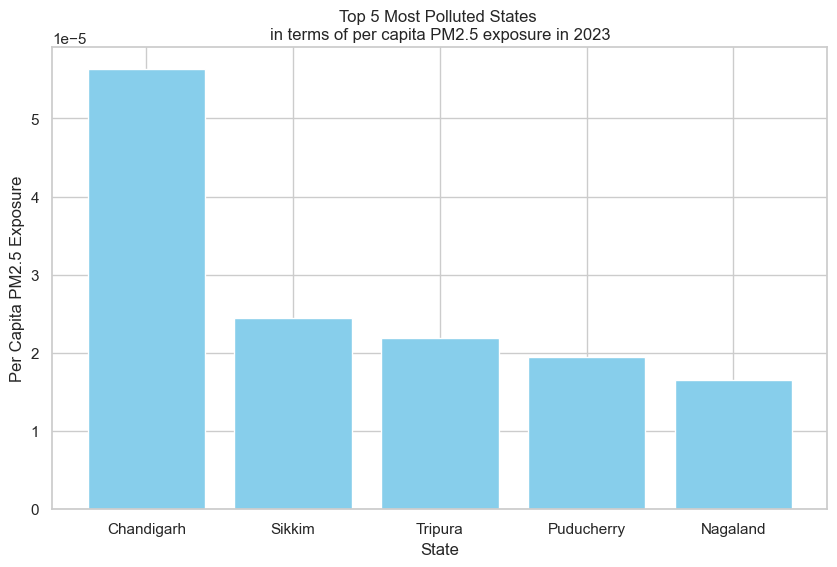

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv(path1, parse_dates=['Timestamp'])
df.rename(columns={'state': 'State'}, inplace=True)
state_data = pd.read_csv(path2)

# Get data for 2023
df_2023 = df[df['Timestamp'].dt.year == 2023].copy()

# Group by state and calc avg PM2.5 levels
state_pm25 = df_2023.groupby('State')['PM2.5'].mean()

# Merge with population data
state_pm25 = state_pm25.reset_index()
state_data = state_data[['State', 'Population']]
merged = pd.merge(state_pm25, state_data, on='State', how='left')

# Calc per capita PM2.5 exposure
merged['Per_Capita_PM2.5'] = merged['PM2.5'] / merged['Population']

# Top 5 most polluted states per capita
top5_states = merged.nlargest(5, 'Per_Capita_PM2.5')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top5_states['State'], top5_states['Per_Capita_PM2.5'], color = 'skyblue')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States \nin terms of per capita PM2.5 exposure in 2023')

plt.show()

## Q3

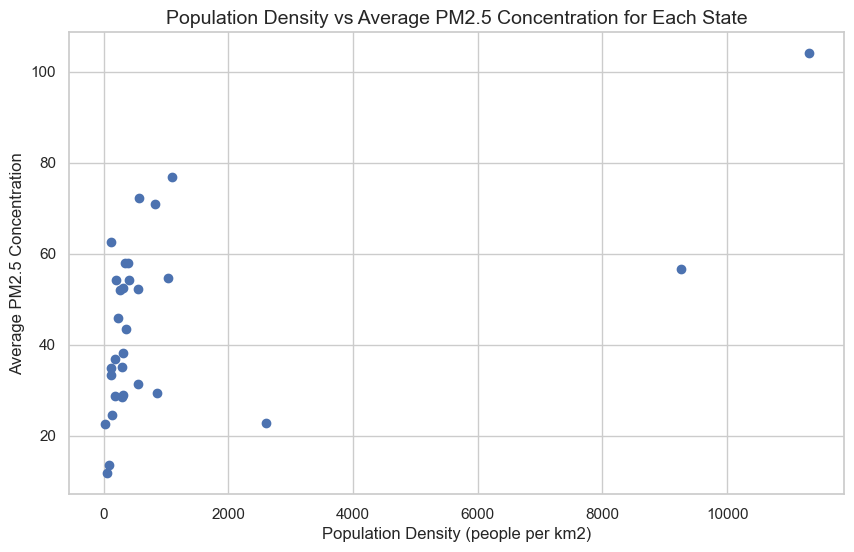

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df_population = pd.read_csv(path2)
df_pollution = pd.read_csv(path1)
df_pollution.rename(columns={'state': 'State'}, inplace=True)

# Calc population density
df_population['Population Density'] = df_population['Population'] / df_population['Area (km2)']

# Calc avg PM2.5 levels for each state
average_pm25 = df_pollution.groupby('State')['PM2.5'].mean().reset_index()

# Merge
merged = pd.merge(df_population[['State', 'Population Density']], average_pm25, on='State', how='inner')

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.scatter(merged['Population Density'], merged['PM2.5'], color='b', marker='o')

plt.title('Population Density vs Average PM2.5 Concentration for Each State', fontsize=14)
plt.xlabel('Population Density (people per km2)', fontsize=12)
plt.ylabel('Average PM2.5 Concentration', fontsize=12)

plt.show()

# Area Based

## Q1

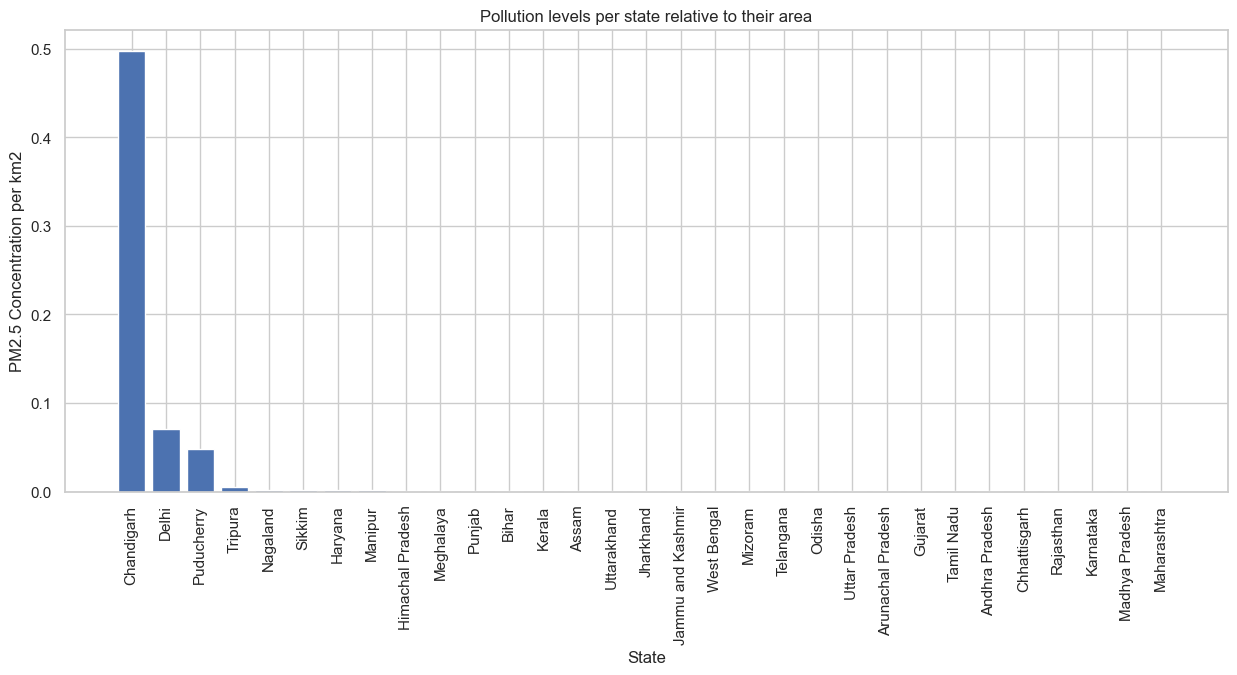

State with the highest PM2.5 concentration per km2: Chandigarh (0.497)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_population = pd.read_csv(path2)
df_pollution = pd.read_csv(path1)
df_pollution.rename(columns={'state': 'State'}, inplace=True)

# Average PM2.5 for each state
pollution = df_pollution.groupby('State')['PM2.5'].mean().reset_index()

# Merge
merged = pd.merge(pollution, df_population[['State', 'Area (km2)']], on='State', how='inner')

# PM2.5 concentration per km2
merged['PM2.5 per km2'] = merged['PM2.5'] / merged['Area (km2)']

# Sort
merged_sorted = merged.sort_values(by='PM2.5 per km2', ascending=False)

# Plot
plt.figure(figsize=(15, 6))
plt.bar(merged_sorted['State'], merged_sorted['PM2.5 per km2'])

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per km2')
plt.title('Pollution levels per state relative to their area')
plt.grid(True)

plt.show()

# State with the highest PM2.5 per km2
most_polluted_state = merged_sorted.iloc[0]['State']
highest_pm25_value = merged_sorted.iloc[0]['PM2.5 per km2']
print(f"State with the highest PM2.5 concentration per km2: {most_polluted_state} ({highest_pm25_value:.3f})")

## Q2

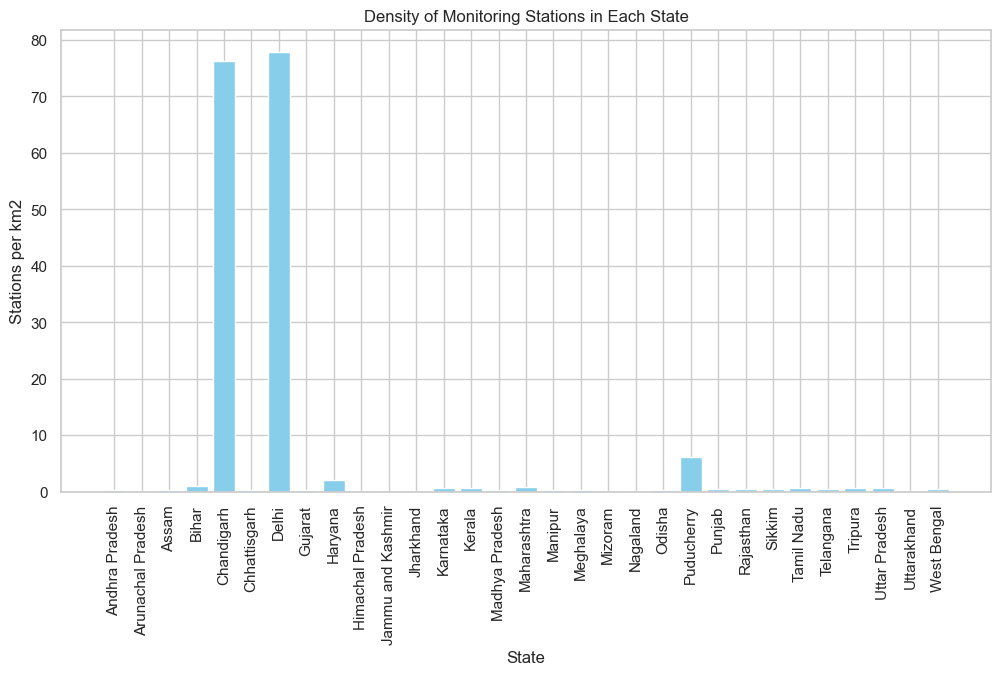

State with the highest monitoring station density: Delhi


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Data = pd.read_csv(path1)
State_data = pd.read_csv(path2)
Data.rename(columns={'state': 'State'}, inplace=True)

# number of monitoring stations in each state
station_counts = Data.groupby('State')['station'].count().reset_index()
station_counts.rename(columns={'station': 'Number of Stations'}, inplace=True)

# Merge to get area of each state
merged_data = station_counts.merge(State_data, on="State")

# Calculate monitoring stations per km2
merged_data['Stations per km2'] = merged_data['Number of Stations'] / merged_data['Area (km2)']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(merged_data['State'], merged_data['Stations per km2'], color = 'skyblue')

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Stations per km2")
plt.title("Density of Monitoring Stations in Each State")
plt.show()

# state with the highest stations density
max_density_state = merged_data.loc[merged_data['Stations per km2'].idxmax(), 'State']
print(f"State with the highest monitoring station density: {max_density_state}")


## Q3

In [19]:
import pandas as pd

df_pollution = pd.read_csv(path1)
df_population = pd.read_csv(path2)
df_pollution.rename(columns={'state': 'State'}, inplace=True)

df_pollution['Timestamp'] = pd.to_datetime(df_pollution['Timestamp'], format='%Y-%m-%d')

# Get the data for 2021
df_2021 = df_pollution[df_pollution['Timestamp'].dt.year == 2021].copy()

# Average PM2.5 for Maharashtra and Madhya Pradesh in 2021
avg_pm25_2021 = df_2021.groupby('State')['PM2.5'].mean().reset_index()

# Get data for Maharashtra and Madhya Pradesh
avg_pm25_2021 = avg_pm25_2021[avg_pm25_2021['State'].isin(['Maharashtra', 'Madhya Pradesh'])]

# Population density for Maharashtra and Madhya Pradesh
df_mh_mp = df_population[df_population['State'].isin(['Maharashtra', 'Madhya Pradesh'])].copy()
df_mh_mp['Population Density'] = df_mh_mp['Population'] / df_mh_mp['Area (km2)']

# Join population density with PM2.5 levels
merged = pd.merge(avg_pm25_2021, df_mh_mp[['State', 'Population Density']], on='State')

# Display the results
print("Population Density and Average PM2.5 levels:\n")
print(merged)

Population Density and Average PM2.5 levels:

            State      PM2.5  Population Density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


Despite Maharashtra having a higher population density compared to Madhya Pradesh, both states have similar average PM2.5 levels. This suggests that while population density can contribute to pollution, factors like industrialization, urbanization, etc. also play a significant role in determining air quality. Therefore, population density alone can't fully explain the differences in pollution levels between states with similar population density.

# Funding Based 

## Q1

In [18]:
import pandas as pd

df_pollution = pd.read_csv(path1)
df_population = pd.read_csv(path2)
df_ncap = pd.read_csv(path3)

df_pollution.rename(columns={'state': 'State'}, inplace=True)
df_pollution['Timestamp'] = pd.to_datetime(df_pollution['Timestamp'], format='%Y-%m-%d')

# Get the data for 2021
df_2021 = df_pollution[df_pollution['Timestamp'].dt.year == 2021].copy()

# Average PM2.5 for each state in 2021
avg_pm25_2021 = df_2021.groupby('State')['PM2.5'].mean().reset_index()

# Get the list of states that received NCAP funding
ncap_states = df_ncap['State'].tolist()

# Split into states with and without NCAP funding
ncap_funded = avg_pm25_2021[avg_pm25_2021['State'].isin(ncap_states)]
non_ncap_funded = avg_pm25_2021[~avg_pm25_2021['State'].isin(ncap_states)]

# Calculate the average PM2.5 levels for each group
avg_pm25_ncap = ncap_funded['PM2.5'].mean()
avg_pm25_non_ncap = non_ncap_funded['PM2.5'].mean()

print(f"Average PM2.5 for states with NCAP funding in 2021: {avg_pm25_ncap:.2f}")
print(f"Average PM2.5 for states without NCAP funding in 2021: {avg_pm25_non_ncap:.2f}")

Average PM2.5 for states with NCAP funding in 2021: 48.94
Average PM2.5 for states without NCAP funding in 2021: 32.95


## Q2

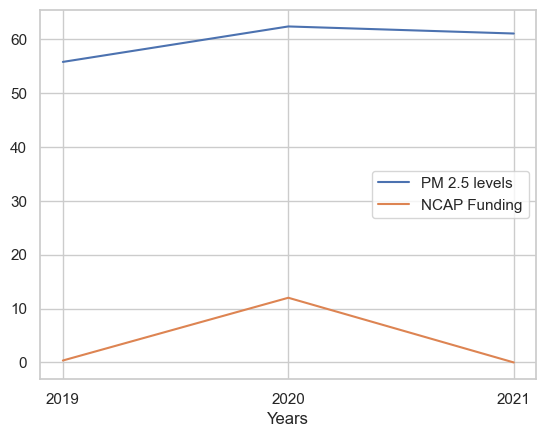

In [134]:
from matplotlib.ticker import MaxNLocator

df5 = pd.read_csv(path3)

df_funding_assam = df5[df5["State"] == 'Assam'].copy()
df_PM_assam = df[df["state"] == "Assam"].copy()
df_PM_assam["year"] = df_PM_assam["Timestamp"].dt.year
df_PM_assam = df_PM_assam.groupby('year')["PM2.5"].mean()
funding_cols = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22",
]
# Convert funding columns to numeric, forcing errors to NaN
df_funding_assam[funding_cols] = df_funding_assam[funding_cols].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (if missing values should be counted as zero funding)
df_funding_assam[funding_cols] = df_funding_assam[funding_cols].fillna(0)

# Initialize dictionary to store funding per year
funding_per_year = {}

# Extract funding values for each year (starting from 2019)
for i, column in enumerate(funding_cols, start=2019):
    funding_per_year[i] = df_funding_assam[column].sum()

# Convert to DataFrame
df_funding_assam_grouped = pd.DataFrame(list(funding_per_year.items()), columns=["year", "NCAP Funding"])

df_funding_assam_grouped = pd.DataFrame(list(funding_per_year.items()), columns=["year", "NCAP Funding"])
df_combined = pd.merge(df_PM_assam, df_funding_assam_grouped, on="year", how="inner")
df_combined
plt.ticklabel_format(useOffset=False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(df_combined["year"].tolist(), df_combined["PM2.5"].tolist(), label = "PM 2.5 levels")
plt.plot(df_combined["year"].tolist(), df_combined["NCAP Funding"].tolist(), label = "NCAP Funding")
plt.legend()
plt.xlabel("Years")
plt.grid(True)
plt.show()

An increment of the financing has led to a slight improvement in air quality.    
As the fundings were increased from 2019 to 2020, there is still an increase in the PM2.5 levels. After a considerable increase in fundings, in the year 2020, the PM2.5 levels slightly dropped in the following time.

## Q3

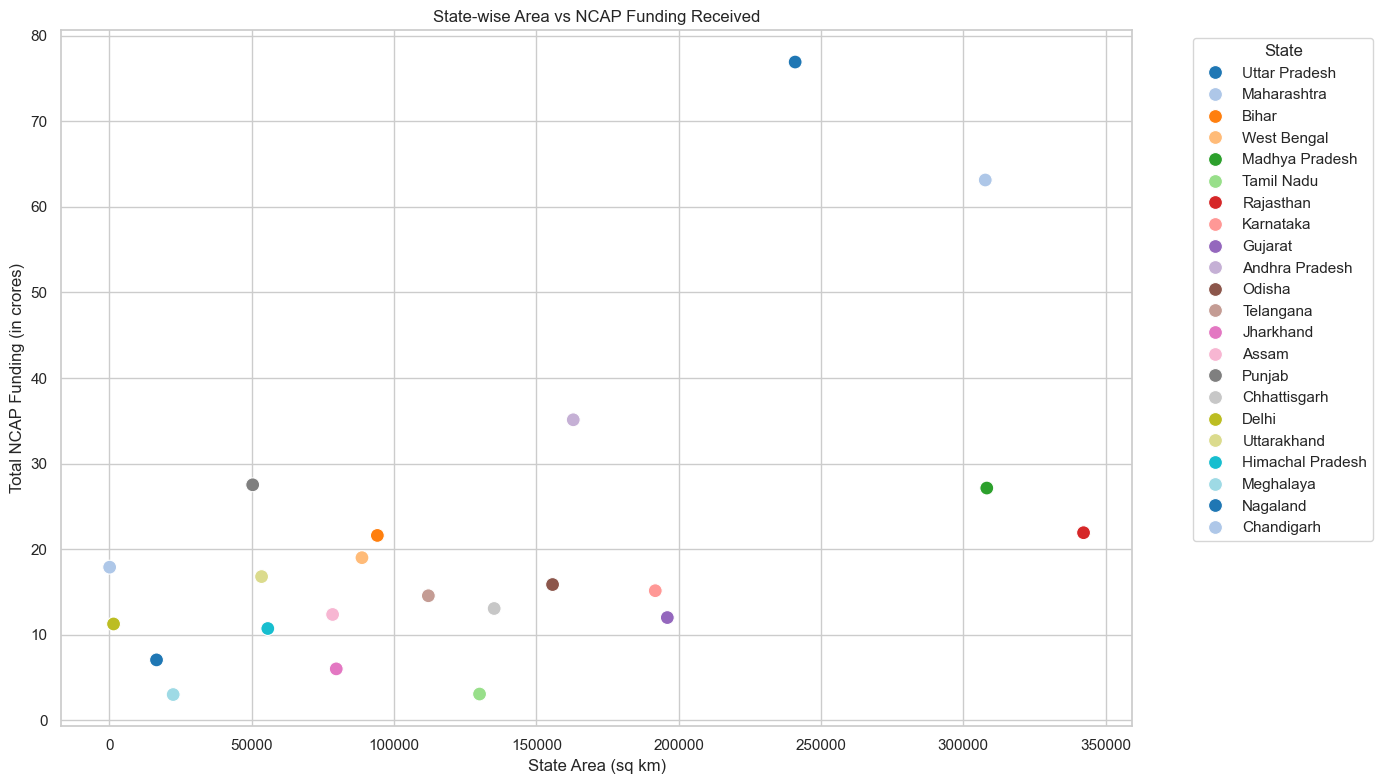

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_population = pd.read_csv(path2)
df_ncap = pd.read_csv(path3)

# Rename columns for consistency
df_population.rename(columns={'Area (km2)': 'Area_sq_km'}, inplace=True)
df_ncap.rename(columns={'Total fund released': 'Total_Funding_Crores'}, inplace=True)

# Group NCAP data by state to get total funding per state
df_ncap_statewise = df_ncap.groupby('State', as_index=False)['Total_Funding_Crores'].sum()

# Merge datasets based on State
df_merged = pd.merge(df_population, df_ncap_statewise, on="State", how="inner")

# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(14, 8))  # Adjusted size for better clarity
scatter = sns.scatterplot(
    data=df_merged,
    x='Area_sq_km',
    y='Total_Funding_Crores',
    hue='State',
    palette=sns.color_palette("tab20", len(df_merged['State'].unique())),
    s=100
)

# Adjust legend position outside the plot
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

# Labels and title
plt.xlabel("State Area (sq km)")
plt.ylabel("Total NCAP Funding (in crores)")
plt.title("State-wise Area vs NCAP Funding Received")

# Show plot
plt.tight_layout()  # Ensure the legend fits outside the plot
plt.show()

# Miscellaneous Questions

# Q1

In [17]:
import pandas as pd

df = pd.read_csv(path1)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

# Get data for 2023
df_2023 = df[df['Timestamp'].dt.year == 2023].copy()

# Group by City and calculate avg PM2.5
city_avg_pm25 = df_2023.groupby('city')['PM2.5'].mean()

# Most polluted city
most_polluted_city = city_avg_pm25.idxmax()
highest_avg_pm25 = city_avg_pm25.max()

# Get data for the most polluted city
df_most_polluted = df_2023[df_2023['city'] == most_polluted_city]
df_most_polluted = df_most_polluted.dropna(subset = ["PM2.5"]).copy()

# Count the number of days with PM2.5 > 300
hazardous_days = (df_most_polluted['PM2.5'] > 300).sum()

# Total number of days recorded for this city
total_days = df_most_polluted['Timestamp'].nunique()

# Calculate percentage of hazardous days
percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Percentage of Hazardous Days: {percentage_hazardous_days:.3f}%")

Most Polluted City in 2023: Darbhanga
Percentage of Hazardous Days: 23.077%


## Q2

Spikes in Average PM2.5 Levels During Festivals in Delhi (2018-2020): 


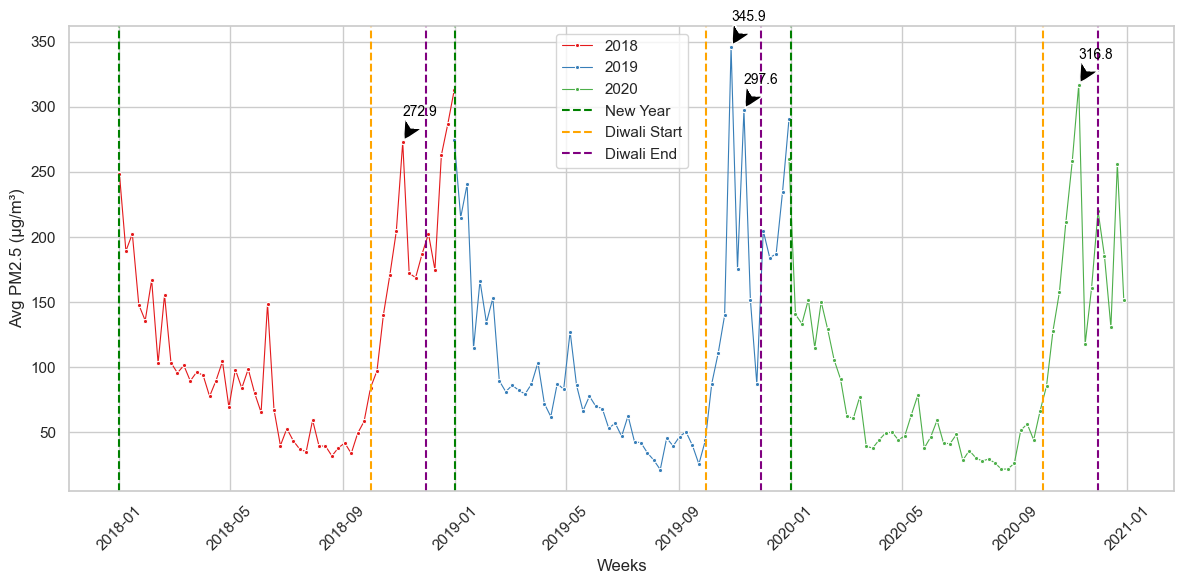

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(path1)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

# Filter data for Delhi
df_delhi = df[df['city'] == 'Delhi'].copy()

# Extract year and week
df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Week'] = df_delhi['Timestamp'].dt.to_period('W').astype(str)  # Convert to weekly period

# Filter for the years 2018-2020
df_delhi = df_delhi[df_delhi['Year'].isin([2018, 2019, 2020])]

# Compute average PM2.5 for each week
df_weekly_avg = df_delhi.groupby(['Year', 'Week'])['PM2.5'].mean().reset_index()

# Convert 'Week' column to datetime for plotting
df_weekly_avg['Week'] = pd.to_datetime(df_weekly_avg['Week'].apply(lambda x: x.split('/')[0]))

# Compute PM2.5 spike threshold (95th percentile)
spike_threshold = df_weekly_avg['PM2.5'].quantile(0.95)

# Plot the weekly average PM2.5 levels
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly_avg, x='Week', y='PM2.5', hue='Year', linewidth= 0.8 , marker='.', palette='Set1')

# Mark festival spikes using arrows
for _, row in df_weekly_avg.iterrows():
    if row['PM2.5'] > spike_threshold and row['Week'].month in [1, 10, 11]:  
        plt.annotate(
            f"{row['PM2.5']:.1f}",  
            xy=(row['Week'], row['PM2.5']),  
            xytext=(row['Week'], row['PM2.5'] + 20),  
            arrowprops=dict(facecolor="black", arrowstyle="fancy", mutation_scale=35),
            fontsize=10,
            color="black"
        )

# Highlight Jan 1, Oct 1, and Nov 30 for each year
for year in [2018, 2019, 2020]:
    for date, label, color in zip(
        [f"{year}-01-01", f"{year}-10-01", f"{year}-11-30"],
        ["New Year", "Diwali Start", "Diwali End"],
        ["green", "orange", "purple"]
    ):
        plt.axvline(pd.to_datetime(date), color=color, linestyle="--", alpha=1, label=label if year == 2018 else "")

# Labels and title
plt.xlabel("Weeks")
plt.ylabel("Avg PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Show plot
print("Spikes in Average PM2.5 Levels During Festivals in Delhi (2018-2020): ")
plt.show()


The above graph shows the relation between the avergae PM2.5 (µg/m³) concentration every week across the years 2018 - 2020.   
We can observe a peak in the PM2.5 concentration during the new year, as well as the significant rise during Diwali. 

## Q3

The state with the highest NCAP funding in 2020: Assam


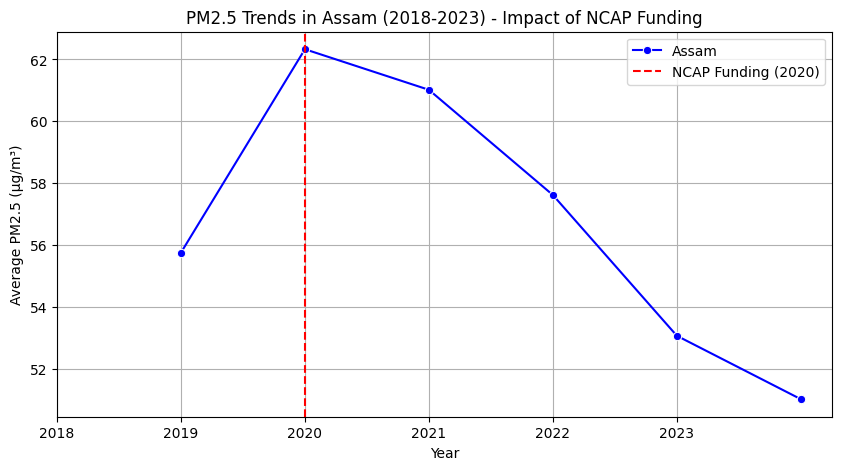

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pollution = pd.read_csv(path1)
df_ncap = pd.read_csv(path3)

# Convert timestamp to datetime format
df_pollution['Timestamp'] = pd.to_datetime(df_pollution['Timestamp'], format='%Y-%m-%d')

df_ncap.rename(columns={'Amount released during FY 2020-21': 'Funding_2020'}, inplace=True)

# state with highest NCAP funding in 2020
state_highest_funding = df_ncap.groupby("State")['Funding_2020'].sum().idxmax()
highest_funding_amount = df_ncap.groupby("State")['Funding_2020'].sum().max()

print(f"The state with the highest NCAP funding in 2020: {state_highest_funding}")

# Filter pollution data for cities in that state
df_state_cities = df_ncap[df_ncap['State'] == state_highest_funding]['City']
df_state_pollution = df_pollution[df_pollution['city'].isin(df_state_cities)].copy()

# Yearly PM2.5 averages (2018-2023)
df_state_pollution['Year'] = df_state_pollution['Timestamp'].dt.year
yearly_pm25 = df_state_pollution.groupby('Year')['PM2.5'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_pm25.index, y=yearly_pm25.values, marker='o', label=state_highest_funding, color='blue')

# Mark NCAP Funding yr
plt.axvline(x=2020, linestyle='--', color='red', label='NCAP Funding (2020)')

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trends in {state_highest_funding} (2018-2023) - Impact of NCAP Funding")
plt.legend()
plt.grid(True)
plt.xticks(range(2018, 2024))

# Show plot
plt.show()

From the graph we can see that after recieving funding in 2020, the average PM2.5 concentration has decreased by 2023.

## Q4

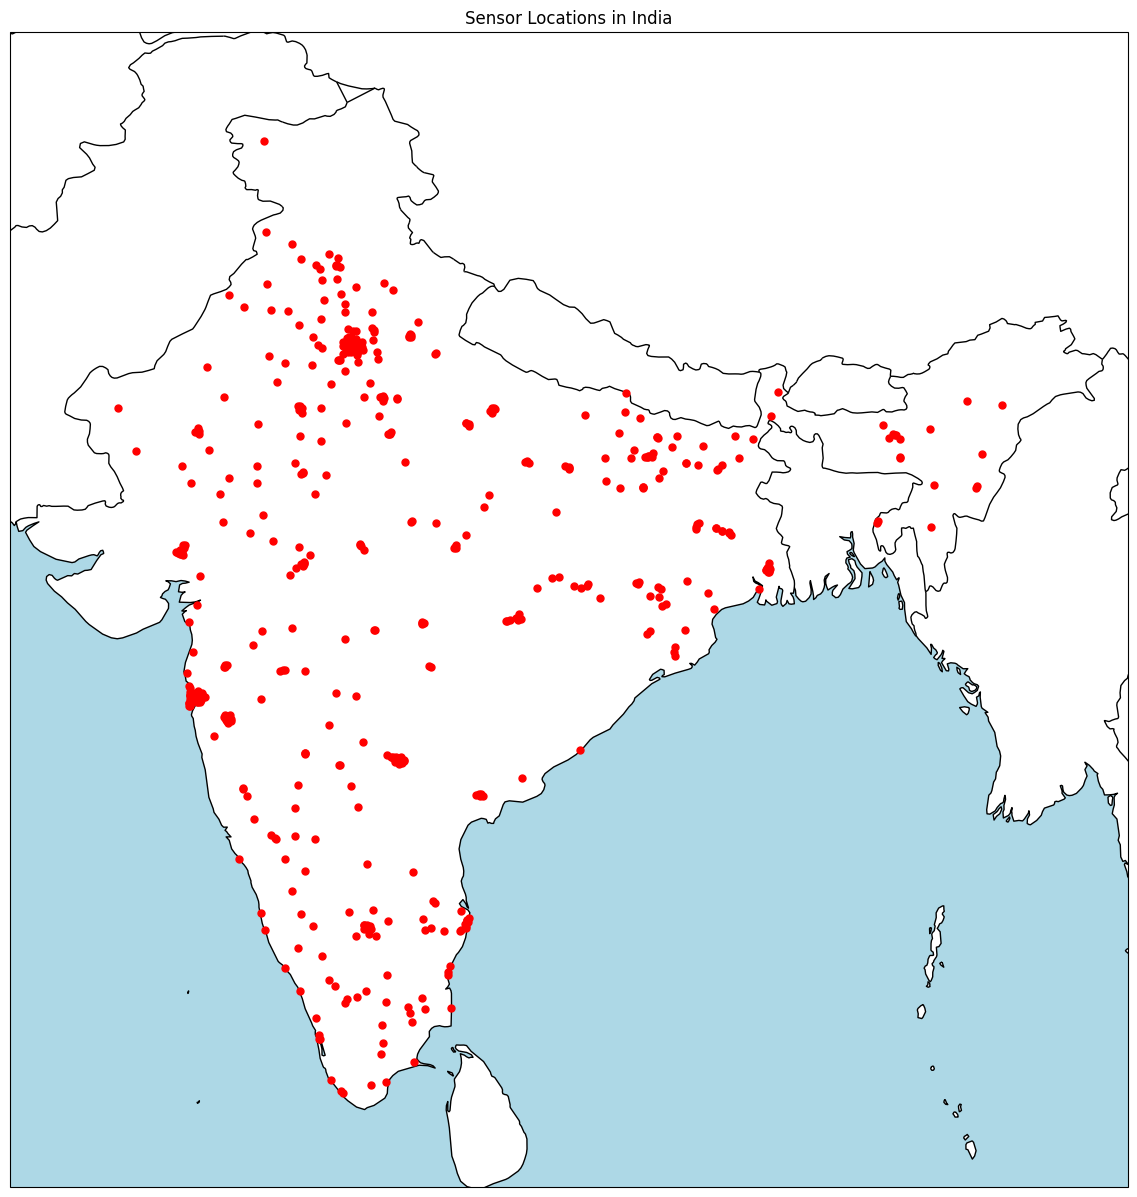

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv(path1)

# Grouping data by station and calculating mean of latitude and longitude
x = df[["latitude", "longitude", "station"]].groupby(["station"]).mean()

# Create map of India using PlateCarree
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Set extent for the map (India's boundaries)
ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]

# Plot sensor locations
for i in range(len(x)):
    ax.plot(x.iloc[i, 1], x.iloc[i, 0], marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    
ax.set_title('Sensor Locations in India')

plt.show()

# Tell us something new

From the dataset, an interesting observation could be the relationship between the density of monitoring stations and the accuracy of PM2.5 measurements across various states. States with higher densities of monitoring stations may have more accurate and frequent measurements of PM2.5 levels.   
This can be verified by plotting the relationship between station density and the variability (standard deviation) of PM2.5 measurements (A higher standard deviation indicates more variation in measurements, which may suggest less consistent or less accurate readings across stations). 

We can also see if the station density can be correlated with the number of missing values in the PM2.5 column. A lesser station density can lead to more missing values, which can be veried by plotting a graph between them.